## Funciones de distribucion de probabilidades

##Distribucion Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(2018)

In [2]:
a = 1 #minimo
b= 100 #maximo
n = 1000000 #cantidad de numeros
#Genera numeros aleatorios generados de manera uniforme
data = np.random.uniform(a, b, n) #distribucion uniforme

(array([100067.,  99952., 100755., 100317., 100144.,  99761.,  99876.,
         99624.,  99765.,  99739.]),
 array([ 1.00016486, 10.90014808, 20.80013131, 30.70011454, 40.60009777,
        50.50008099, 60.40006422, 70.30004745, 80.20003068, 90.10001391,
        99.99999713]),
 <BarContainer object of 10 artists>)

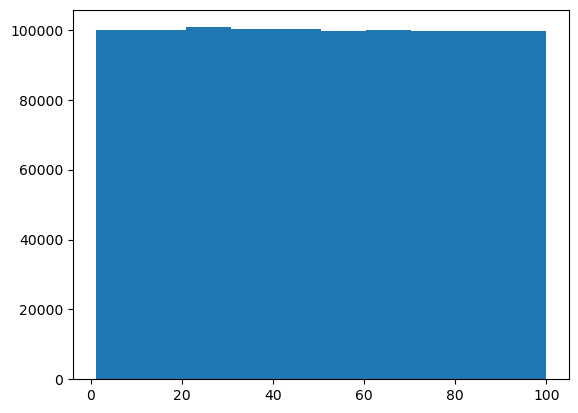

In [3]:
#pinta el diagrama de numeros
%matplotlib inline 
plt.hist(data) #tipo de grafico histograma

#Distribucion normal - "BELL CURVE" - La Campana de Gauss

## La funcion randn genera una distribucion normal estandar, es decir con media 0 (verticalmente el eje) y desviacion tipica 1 (la acumulacion de mas datos en este rango).  -1,0,1 expresado en coordenadas

In [4]:
data = np.random.randn(1000000) 

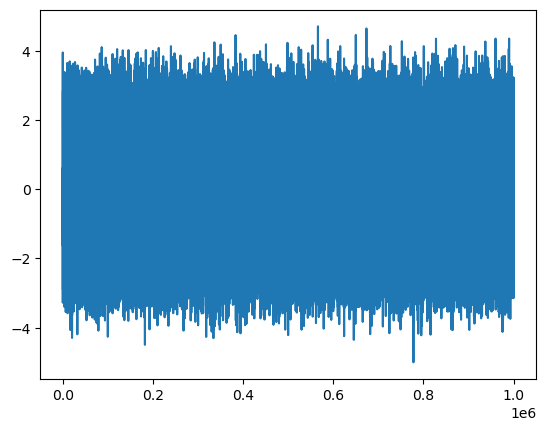

In [5]:
x = range(1 , 1000001)
plt.plot(x, data)

(array([3.00000e+01, 1.09800e+03, 1.73790e+04, 1.13098e+05, 3.08545e+05,
        3.54179e+05, 1.68910e+05, 3.38810e+04, 2.77100e+03, 1.09000e+02]),
 array([-4.99966075, -4.02941437, -3.05916799, -2.08892161, -1.11867523,
        -0.14842885,  0.82181753,  1.79206391,  2.76231029,  3.73255667,
         4.70280305]),
 <BarContainer object of 10 artists>)

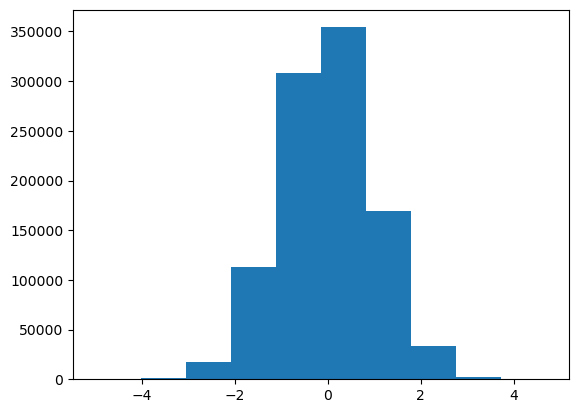

In [6]:
%matplotlib inline 
plt.hist(data)

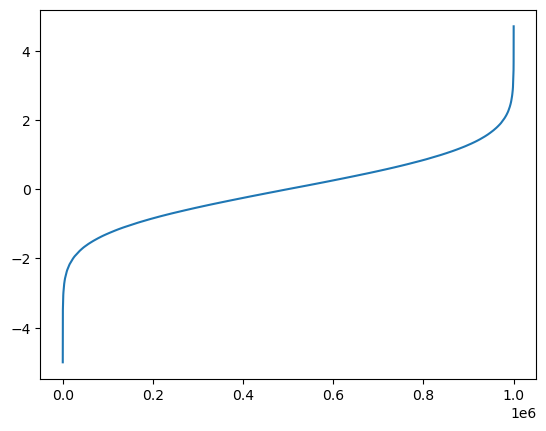

In [7]:
plt.plot(x, sorted(data)) #pinta los datos ordenados

#(PARA GENERAR UNA DISTRIBUCION NORMAL SOLAMENTE HAY QUE REALIZAR UNA ECUACION)


(array([  25.,  171.,  780., 2125., 2962., 2355., 1186.,  343.,   49.,
           4.]),
 array([-3.34663946, -1.45364365,  0.43935215,  2.33234796,  4.22534377,
         6.11833958,  8.01133538,  9.90433119, 11.797327  , 13.69032281,
        15.58331861]),
 <BarContainer object of 10 artists>)

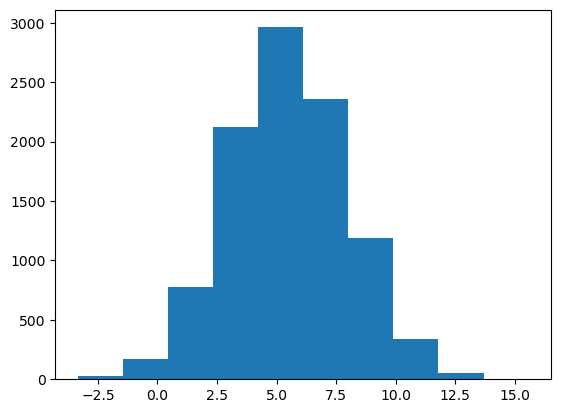

In [8]:
mu = 5.5 #media
sd = 2.5 #desviacion estandar 2.5 puntos arriba y 2.5 puntos abajo
z_10000 = np.random.randn(10000) #variable aleatoria
data = mu + sd * z_10000  # MEDIA + DESVIACION ESTANDAR * VARIABLE ALEATORIA
plt.hist(data)

#La funcion randn puede devolver n colecciones de n elementos on randn(2,4) estoy devolviendo 2 colecciones con 4 elementos

# La simulacion de Monte Carlo

Leyenda de Monte Carlo, el metodo se le ocurrio a jhon von newman mientras estaba enfermo y el tio en monte carlo jugaba al solitario con el..
Tiene que ver con juegos de azar la ciudad de Monaco..

Calculo de valor exacto de PI
Un circulo de radio **r** y el radio sera fijo y conocido. El circulo estara dentro de un cuadrado de lado **2r**.

**Problema:** Cual es la probabilidad que si elijo un punto cualquiera al azar dentro del cuadrado caiga dentro del circulo

P(Caer en el circulo) = caer dentro del circulo / caer dentro del cuadrado
= area circulo / area cuadrado 
= **PI**  / 4 (simplificado de las 2 areas usando radio)

**Solucion:** Al lograr el resultado final solo hace falta multiplicarlo por 4 para encontrar en valor de **PI**

* Generamos dos numeros aleatorios uniforme x e y entre 0 y 1

* Calcularemos x * x + y * y (formula del circulo)

* Si el valor es inferior a 1 estamos dentro del circulo

* Si el valor es superior a 1 estamos fuera del circulo

* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caere dentro del circulo.

* Usamos dicha probabilidad para aproximar el valor de PI

* Repetimos el experimento un numero suficiente de veces (por ejemplo), para obtener (1000) diferentes aproximaciones de PI.

* Calculamos el promedio de los 1000 experimentos anteriores para dar un valor final de PI.

In [9]:
#para que esto funcione tienen que ser la variable aleatoria, tienen que ser los numeros x igual de probables. Si fuera distribucion normal seria mas probable un grupo del conjunto
def pi_montecarlo(n, n_exp):
    pi_avg = 0 #variable
    pi_value_list = [] #array vacio
    
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist() #genero 1000 nros aleatorios de x entre 0 y 1
        y = np.random.uniform(0,1,n).tolist() #genero 1000 nros aleatorios de y entre 0 y 1
    
        for j in range(n): #de esos 1000 valores que eh generado voy calculando la formula
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            #si el numero obtenido es menor o igual que 1, sumamos uno al valor
            if z<=1:
                value += 1 #intentos que hemos hecho
            
        float_value = float(value) #convierte a valor en float
        pi_value = float_value * 4 /n #calculamos el valor de PI en base al valor obtenido
                                 #el resultado lo multiplico por 4 y lo divido por los casos posibles.
        pi_value_list.append(pi_value) #Agrego el valor de pi calculado a la lista con append
        pi_avg += pi_value
    
    pi = pi_avg/n_exp
    
    print("Valor aproximado final:", pi)
    fig = plt.plot(pi_value_list)  
    return (pi,fig)

In [10]:
pi_montecarlo(100000, 200)

KeyboardInterrupt: 

# Dummy Data Sets

In [41]:
n=100000
data = pd.DataFrame(
    {
        "A": np.random.randn(n),
        "B": 1.5+2.5*np.random.randn(n),
        "C": np.random.uniform(5,32,n)
    }
)

In [42]:
data.describe() #para ver resumen estadisticos del conjunto de las columnas

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,0.000499,1.493048,18.506251
std,1.001474,2.505738,7.784315
min,-4.144642,-10.635308,5.000047
25%,-0.675451,-0.195041,11.756427
50%,-0.000426,1.504967,18.538279
75%,0.677193,3.177823,25.209087
max,4.180279,12.073967,31.999920


In [43]:
data = pd.read_csv("C://Users/20385265035/Desktop/Proyectos de Python/datasets/PCLConComunas.txt",sep=";")

In [44]:
data.head()

,ID_REGISTRO,EXPEDIENTE_PSOC,ANIO_RIB,NUMERO_RIB,NUMERO_DOCUMENTO,CUIL,APELLIDO,NOMBRE,COMUNA,FK_TIPO_DOMICILIO,BARRIO,DESCRIPCION_COMUNA,ID_COMUNA,FK_BARRIO,DESCRIPCION_SIS_BARRIO,DESCRIPCION_CORTA,ID_BARRIO
0,1091700,EX-2022-35077150- -GCABA-DGDCC,2017,27006780,47167378,NaN,PETRENKO,SASHA,Comuna 1,3,San NicolÃ¡s,Comuna 1,3.0,32.0,San NicolÃ¡s,NaN,32.0
1,1089273,EX-2022-33351911- -GCABA-DGDCC,2017,27004375,47277029,NaN,COLSO,GASTON ARIEL,Comuna 1,3,San NicolÃ¡s,Comuna 1,3.0,32.0,San NicolÃ¡s,NaN,32.0
2,1434922,EX-2022-36342896- -GCABA-DGDCC,2022,27093433,22125866,2.022126e+10,TARANTINO,ANGEL,Comuna 1,1,Monserrat,NaN,NaN,NaN,NaN,NaN,NaN
3,1453226,EX-2022-37612807- -GCABA-DGDCC,2022,37611349,17849160,2.717849e+10,VEGA,SANDRA MIRIAM,Comuna 1,1,Monserrat,NaN,NaN,NaN,NaN,NaN,NaN
4,1454276,EX-2022-38324657- -GCABA-DGDCC,2022,38323456,46758907,2.046759e+10,LUNA,PABLO,Comuna 1,1,Constitucion,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
colum_names = data.columns.values.tolist()

In [46]:
a = len(colum_names)
a

17

In [59]:
new_data = pd.DataFrame(
    {
        "A": np.random.randn(a),
        "B": np.random.uniform(),
        "Column Name": colum_names
    }, index =range(42,42+a)
)

In [57]:
new_data

,A,B,Column Name
42,0.503217,0.688385,ID_REGISTRO
43,0.172423,0.688385,EXPEDIENTE_PSOC
44,-0.409589,0.688385,ANIO_RIB
45,-0.425302,0.688385,NUMERO_RIB
46,-0.806351,0.688385,NUMERO_DOCUMENTO
47,-0.579263,0.688385,CUIL
48,0.189730,0.688385,APELLIDO
49,0.572140,0.688385,NOMBRE
50,0.858946,0.688385,COMUNA
51,-0.201189,0.688385,FK_TIPO_DOMICILIO
